# Практическая демонстрация работы линейной регрессии 
## Основные моменты: 
- Построение простейшей линейной регрессии 
- Оценка модели при помощи основных метрик



In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Построение простейшей линейной регрессии

## Самый простой случай: одномерная линейная регрессия без регуляризации

- Используется простой синтетический датасет.
- Цель: продемонстрировать, как линейная регрессия находит наилучшую прямую без применения регуляризации.


## Вручную создадим датасет, подходящий для линейной регрессии, но с добавленным шумом

- Сгенерируем данные, лежащие вдоль прямой.
- Добавим искусственный шум, чтобы усложнить задачу и протестировать устойчивость модели.
- В дальнейшем можно будет сравнить модель с и без регуляризации.


In [10]:
n = 400
w = 3.5
b = -7

# Генерация X из нормального распределения
X = np.random.uniform(-10, 10, size=n)

# Генерация шума 
noise = np.random.uniform(-10, 10, size=n)

# Генерация Y по линейной зависимости с шумом
y = w * X + b + noise

df = pd.DataFrame({
    'X': X,
    'y': y
})

Визуализируем сгенерированные точки на графике


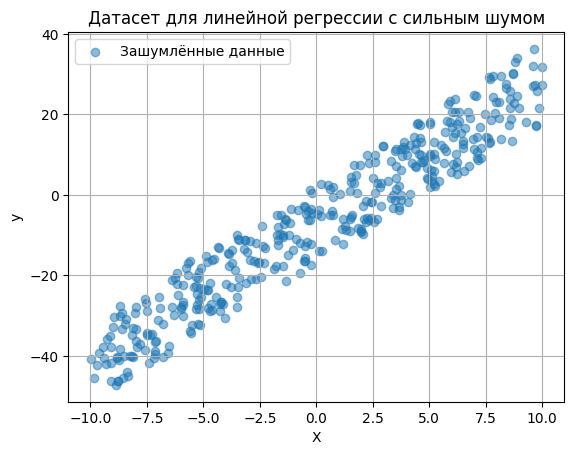

In [11]:
plt.scatter(X, y, alpha=0.5, label="Зашумлённые данные")
plt.title("Датасет для линейной регрессии с сильным шумом")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
X = df[['X']]
y = df['y']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)

(268, 1) (268,)


In [14]:
model = LinearRegression().fit(X_train, y_train)

predict = model.predict(X_test)

## Оценка модели при помощи основных метрик 

In [18]:
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
mape = mean_absolute_percentage_error(y_test, predict) * 100
rmse = root_mean_squared_error(y_test, predict)

print(f'mse:{mse:.4f}|mae{mae:.4f}|mape:{mape:.4f}|rmse{rmse:.4f}')

mse:31.9632|mae4.8463|mape:58.5215|rmse5.6536
